<a href="https://colab.research.google.com/github/saugata-malakar/Automatic-leaf-infection-identifier/blob/master/%22EthicalChain_AI_Driven_Insights_for_Supply_Chain_Transparency_%26_Compliance%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: import all the ml lib

# Data manipulation
import numpy as np
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
# TensorFlow and Keras (Deep Learning)
try:
  import tensorflow as tf
  from tensorflow import keras
  from keras.models import Sequential
  from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
except ImportError:
  print("TensorFlow not installed. Install with: !pip install tensorflow")
# PyTorch (Deep Learning)
try:
  import torch
  import torch.nn as nn
  import torch.optim as optim
except ImportError:
  print("PyTorch not installed. Install with: !pip install torch torchvision torchaudio")
print("All common ML libraries imported (if installed).")

All common ML libraries imported (if installed).


In [3]:
# Try reading with a different encoding, for example 'latin-1' or 'ISO-8859-1'
try:
    df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='latin-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        print("Could not decode the file with latin-1 or ISO-8859-1 encoding. You may need to try other encodings or inspect the file content to determine the correct encoding.")

In [5]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [6]:
import pandas as pd

# Load the dataset
file_path = '/content/DataCoSupplyChainDataset.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Use correct encoding if UTF-8 fails

# Display basic info
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())


Shape of dataset: (65561, 53)

Column names:
 ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Pric

In [7]:
# Basic statistical summary for numerical columns
print("\nDescriptive Statistics:\n")
print(df.describe())

# Number of unique values per column
print("\nUnique Value Counts:\n")
print(df.nunique().sort_values(ascending=False))


Descriptive Statistics:

       Days for shipping (real)  Days for shipment (scheduled)  \
count              65561.000000                   65561.000000   
mean                   3.422736                       2.802291   
std                    1.631190                       1.401828   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count       65561.000000        65561.000000        65560.000000   
mean           21.342326          175.936754            0.581086   
std           103.739537          122.289619            0.493385   
min         -4274.979980            7.490000            0.000000   
25%             6.150000          100.7

In [8]:
# Late deliveries by country
# Changed df_cleaned to df as df_cleaned was not defined
late_deliveries = df[df['Late_delivery_risk'] == 1]

late_by_country = late_deliveries['Order Country'].value_counts().head(10)

print("\nTop 10 Countries with Most Late Deliveries:\n")
print(late_by_country)


Top 10 Countries with Most Late Deliveries:

Order Country
Estados Unidos    4521
Francia           3225
México            2928
Alemania          2210
Australia         1724
Brasil            1710
Reino Unido       1622
China             1206
Italia            1171
India             1123
Name: count, dtype: int64


In [9]:
import pandas as pd

# Load the dataset
file_path = '/content/DataCoSupplyChainDataset.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Drop irrelevant or sensitive columns
drop_cols = [
    'Customer Password', 'Customer Email', 'Product Image',
    'Customer Fname', 'Customer Lname'
]
df_cleaned = df.drop(columns=drop_cols)

# Rename columns for easier access
df_cleaned.rename(columns={
    'order date (DateOrders)': 'Order Date',
    'shipping date (DateOrders)': 'Shipping Date'
}, inplace=True)

# Convert date columns to datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce')
df_cleaned['Shipping Date'] = pd.to_datetime(df_cleaned['Shipping Date'], errors='coerce')

# Check shape and missing values
print("✅ Cleaned DataFrame shape:", df_cleaned.shape)
print("\n🧼 Missing values (top 10):\n", df_cleaned.isnull().sum().sort_values(ascending=False).head(10))


✅ Cleaned DataFrame shape: (65561, 48)

🧼 Missing values (top 10):
 Product Description    65561
Order Zipcode          57990
Customer Zipcode           3
Late_delivery_risk         1
Customer City              1
Customer Country           1
Customer Segment           1
Category Id                1
Customer State             1
Customer Street            1
dtype: int64


In [10]:
import pandas as pd




# Drop irrelevant or sensitive columns
drop_cols = [
    'Customer Password', 'Customer Email', 'Product Image',
    'Customer Fname', 'Customer Lname'
]
df_cleaned = df.drop(columns=drop_cols)

# Rename date columns for convenience
df_cleaned.rename(columns={
    'order date (DateOrders)': 'Order Date',
    'shipping date (DateOrders)': 'Shipping Date'
}, inplace=True)

# Convert to datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce')
df_cleaned['Shipping Date'] = pd.to_datetime(df_cleaned['Shipping Date'], errors='coerce')

# Shipping Delay
df_cleaned['Shipping Delay (days)'] = (
    df_cleaned['Shipping Date'] - df_cleaned['Order Date']
).dt.days

# Sanity check
print("✅ Data cleaned. Shape:", df_cleaned.shape)
print("Columns:\n", df_cleaned.columns.tolist())


✅ Data cleaned. Shape: (65561, 49)
Columns:
 ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'Order Date', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Name', 'Product Price', 'Product Status', 'Shipping Date', 'Shipping Mode', 'Shipping Delay (days)']


In [11]:
# Average shipping delay and late delivery risk by Customer Segment
segment_analysis = df_cleaned.groupby('Customer Segment').agg({
    'Shipping Delay (days)': 'mean',
    'Late_delivery_risk': 'mean',
    'Order Profit Per Order': 'mean'
}).sort_values(by='Late_delivery_risk', ascending=False)

print("\n📊 Segment-wise ethical risk metrics:\n", segment_analysis)

# Market-level late delivery risk
market_risk = df_cleaned.groupby('Market')['Late_delivery_risk'].mean().sort_values(ascending=False)
print("\n📍 Market-wise late delivery risk:\n", market_risk)

# Region-wise profit and delay
region_analysis = df_cleaned.groupby('Order Region').agg({
    'Shipping Delay (days)': 'mean',
    'Order Profit Per Order': 'mean'
}).sort_values(by='Shipping Delay (days)', ascending=False)

print("\n🌍 Region-wise shipping delays and profits:\n", region_analysis)



📊 Segment-wise ethical risk metrics:
                   Shipping Delay (days)  Late_delivery_risk  \
Customer Segment                                              
Consumer                       3.311633            0.607595   
Corporate                      3.430548            0.563010   
Home Office                    3.609157            0.535036   

                  Order Profit Per Order  
Customer Segment                          
Consumer                       21.587915  
Corporate                      21.169175  
Home Office                    20.942736  

📍 Market-wise late delivery risk:
 Market
USCA            0.594120
Pacific Asia    0.593596
Europe          0.582387
Africa          0.569925
LATAM           0.567563
Name: Late_delivery_risk, dtype: float64

🌍 Region-wise shipping delays and profits:
                  Shipping Delay (days)  Order Profit Per Order
Order Region                                                  
West of USA                   3.465385            

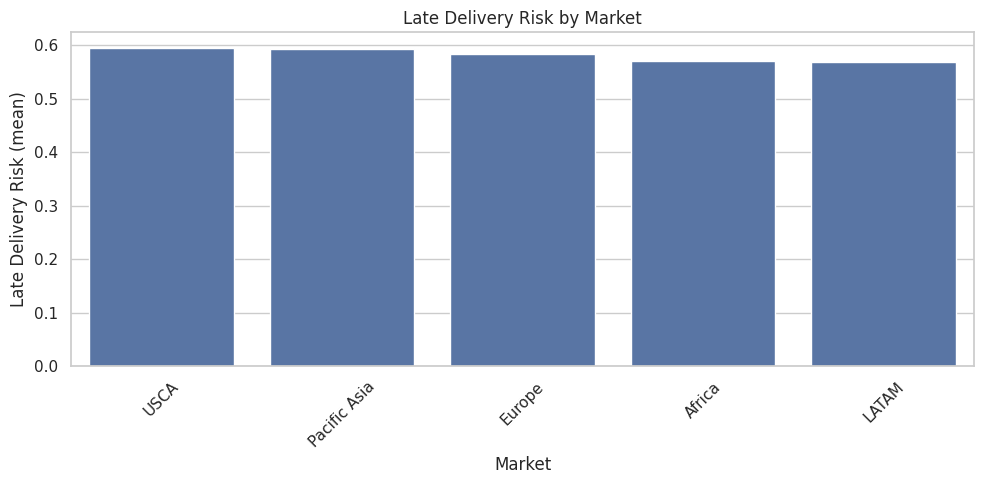

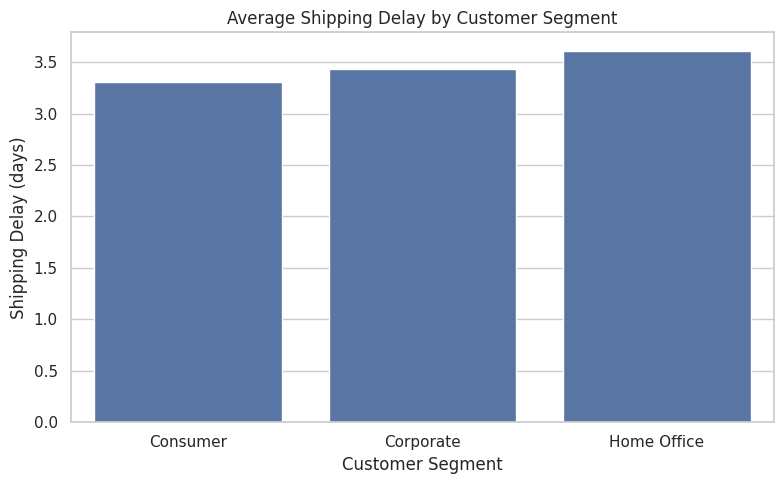

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot: Market vs Late Delivery Risk
plt.figure(figsize=(10,5))
sns.barplot(x=market_risk.index, y=market_risk.values)
plt.title("Late Delivery Risk by Market")
plt.ylabel("Late Delivery Risk (mean)")
plt.xlabel("Market")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Customer Segment vs Shipping Delay
plt.figure(figsize=(8,5))
sns.barplot(x=segment_analysis.index, y=segment_analysis['Shipping Delay (days)'])
plt.title("Average Shipping Delay by Customer Segment")
plt.ylabel("Shipping Delay (days)")
plt.xlabel("Customer Segment")
plt.tight_layout()
plt.show()


In [13]:
# Create binary feature: Long Delay
df_cleaned['Long Delay'] = df_cleaned['Shipping Delay (days)'] > 7  # arbitrarily set 7 days as high

# Create risk score (combining late risk & long delay)
df_cleaned['Ethical Risk Score'] = (
    df_cleaned['Late_delivery_risk'] + df_cleaned['Long Delay'].astype(int)
)

# Preview
print("\n🛠️ Engineered Ethical Risk Indicators:\n")
print(df_cleaned[['Order Id', 'Late_delivery_risk', 'Shipping Delay (days)', 'Long Delay', 'Ethical Risk Score']].head())



🛠️ Engineered Ethical Risk Indicators:

   Order Id  Late_delivery_risk  Shipping Delay (days)  Long Delay  \
0   77202.0                 0.0                    3.0       False   
1   75939.0                 1.0                    5.0       False   
2   75938.0                 0.0                    4.0       False   
3   75937.0                 0.0                    3.0       False   
4   75936.0                 0.0                    2.0       False   

   Ethical Risk Score  
0                 0.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0  


<ipython-input-16-eb6729ee471b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_delay.values, y=category_delay.index, palette='magma')


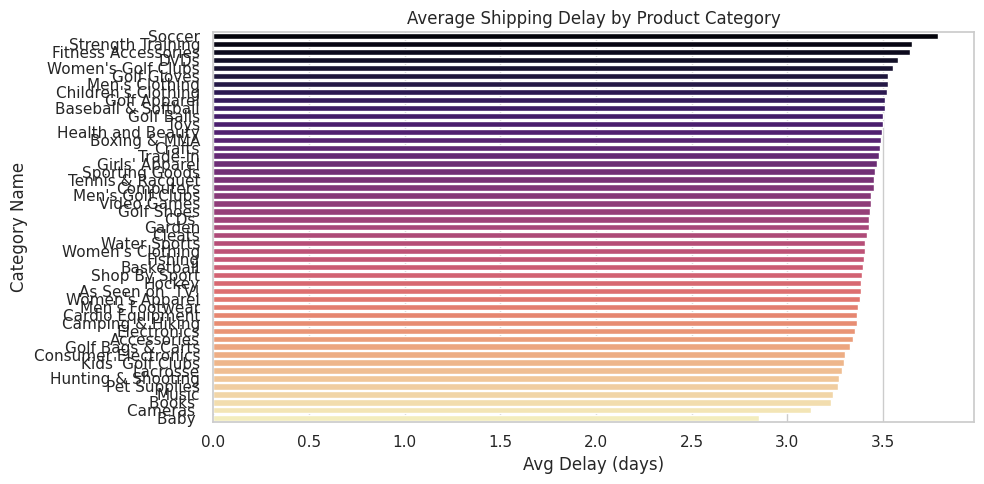

<ipython-input-16-eb6729ee471b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_delay.values, y=dept_delay.index, palette='viridis')


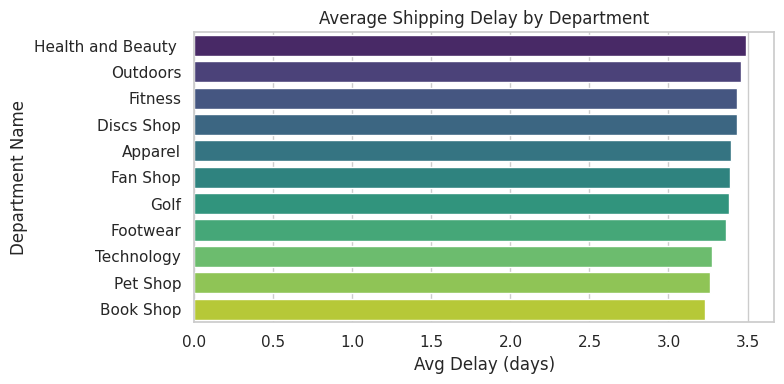

In [16]:
# Average shipping delay by product category
category_delay = df_cleaned.groupby('Category Name')['Shipping Delay (days)'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=category_delay.values, y=category_delay.index, palette='magma')
plt.title("Average Shipping Delay by Product Category")
plt.xlabel("Avg Delay (days)")
plt.tight_layout()
plt.show()

# Delay by Department
dept_delay = df_cleaned.groupby('Department Name')['Shipping Delay (days)'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=dept_delay.values, y=dept_delay.index, palette='viridis')
plt.title("Average Shipping Delay by Department")
plt.xlabel("Avg Delay (days)")
plt.tight_layout()
plt.show()


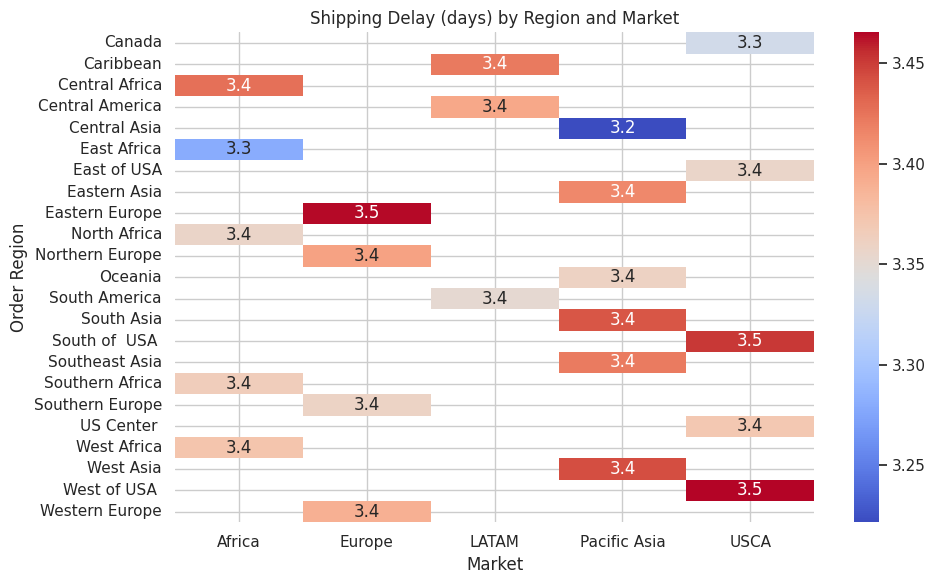

In [17]:
# Heatmap of average shipping delay by Region & Market
region_market_delay = df_cleaned.pivot_table(
    index='Order Region', columns='Market', values='Shipping Delay (days)', aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(region_market_delay, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Shipping Delay (days) by Region and Market")
plt.xlabel("Market")
plt.ylabel("Order Region")
plt.tight_layout()
plt.show()


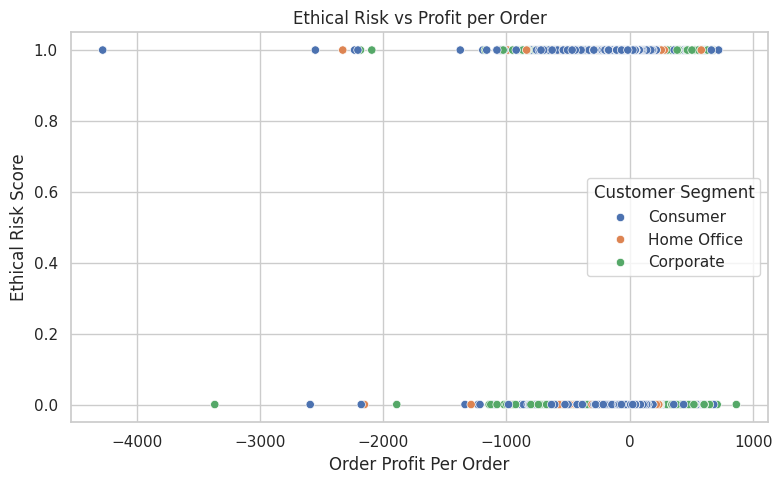


📈 Correlation between Profit and Ethical Risk:
                         Order Profit Per Order  Ethical Risk Score
Order Profit Per Order                1.000000           -0.001836
Ethical Risk Score                   -0.001836            1.000000


In [18]:
# Scatterplot: Profit per Order vs Ethical Risk Score
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_cleaned, x='Order Profit Per Order', y='Ethical Risk Score', hue='Customer Segment')
plt.title("Ethical Risk vs Profit per Order")
plt.xlabel("Order Profit Per Order")
plt.ylabel("Ethical Risk Score")
plt.tight_layout()
plt.show()

# Correlation check
correlation = df_cleaned[['Order Profit Per Order', 'Ethical Risk Score']].corr()
print("\n📈 Correlation between Profit and Ethical Risk:\n", correlation)


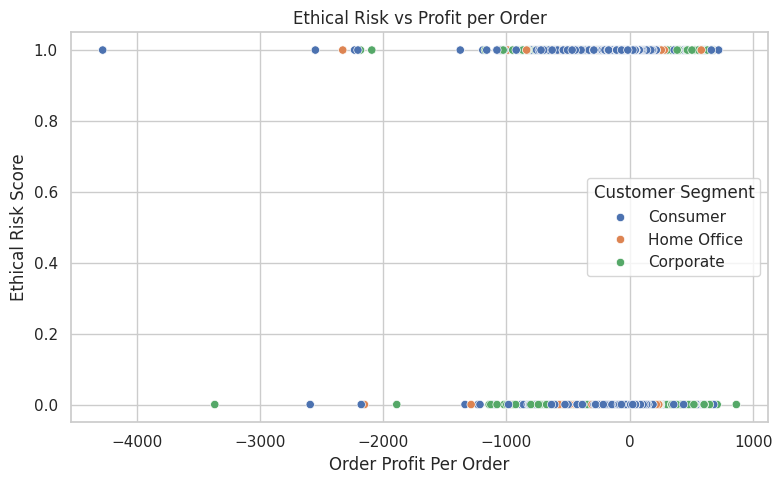


📈 Correlation between Profit and Ethical Risk:
                         Order Profit Per Order  Ethical Risk Score
Order Profit Per Order                1.000000           -0.001836
Ethical Risk Score                   -0.001836            1.000000


In [19]:
# Scatterplot: Profit per Order vs Ethical Risk Score
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_cleaned, x='Order Profit Per Order', y='Ethical Risk Score', hue='Customer Segment')
plt.title("Ethical Risk vs Profit per Order")
plt.xlabel("Order Profit Per Order")
plt.ylabel("Ethical Risk Score")
plt.tight_layout()
plt.show()

# Correlation check
correlation = df_cleaned[['Order Profit Per Order', 'Ethical Risk Score']].corr()
print("\n📈 Correlation between Profit and Ethical Risk:\n", correlation)


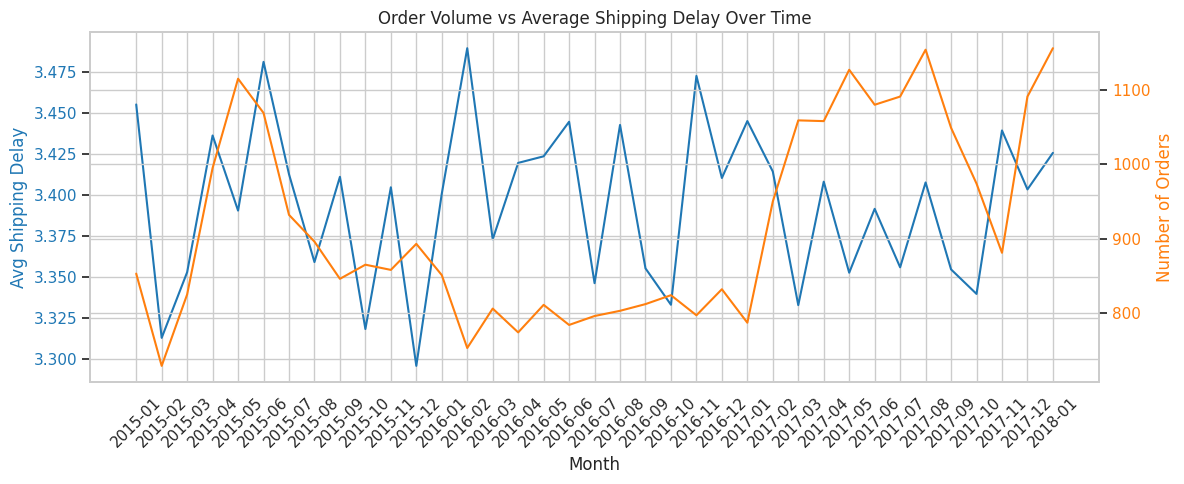

In [20]:
# Add Year-Month column
df_cleaned['YearMonth'] = df_cleaned['Order Date'].dt.to_period('M')

# Average delay per month
monthly_delay = df_cleaned.groupby('YearMonth')['Shipping Delay (days)'].mean()

# Total orders per month
monthly_orders = df_cleaned.groupby('YearMonth')['Order Id'].nunique()

# Plot both
fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Shipping Delay', color=color)
ax1.plot(monthly_delay.index.astype(str), monthly_delay.values, color=color, label='Avg Delay')
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Orders', color=color)
ax2.plot(monthly_orders.index.astype(str), monthly_orders.values, color=color, label='Orders')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Order Volume vs Average Shipping Delay Over Time")
fig.tight_layout()
plt.show()


In [21]:
# Ensure datetime format
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce')

# Drop rows with missing Order Dates
df_time = df_cleaned.dropna(subset=['Order Date']).copy()

# Set datetime index
df_time.set_index('Order Date', inplace=True)

# Resample monthly
monthly_data = df_time.resample('M').agg({
    'Order Id': 'nunique',                        # Order Volume
    'Shipping Delay (days)': 'mean',              # Avg Delay
    'Order Profit Per Order': 'sum',              # Total Profit
    'Ethical Risk Score': 'mean'                  # Avg Ethical Risk
})
monthly_data.rename(columns={
    'Order Id': 'Order Volume',
    'Shipping Delay (days)': 'Avg Delay',
    'Order Profit Per Order': 'Total Profit',
    'Ethical Risk Score': 'Avg Ethical Risk'
}, inplace=True)

monthly_data.head()


<ipython-input-21-0fefaf5b7302>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_time.resample('M').agg({


,Order Volume,Avg Delay,Total Profit,Avg Ethical Risk
Order Date,,,,
2015-01-31,853,3.455121,42368.990101,0.569694
2015-02-28,729,3.312736,40909.519896,0.564313
2015-03-31,825,3.352776,40950.810085,0.576556
2015-04-30,995,3.436200,43229.260013,0.572779
2015-05-31,1115,3.390383,57181.400060,0.587612


<ipython-input-22-1214e146d119>:19: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-1214e146d119>:19: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-1214e146d119>:19: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/I

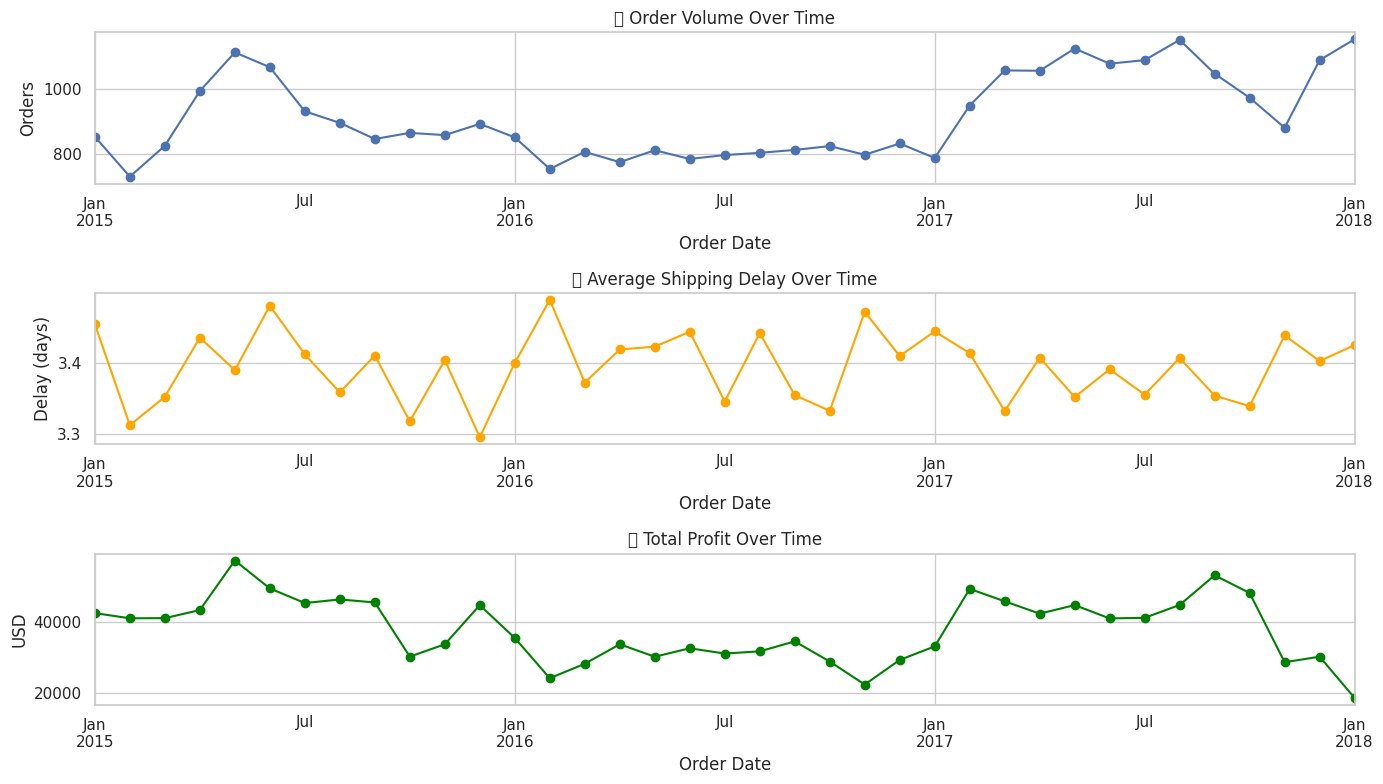

In [22]:
# Plot all metrics
plt.figure(figsize=(14,8))

plt.subplot(3,1,1)
monthly_data['Order Volume'].plot(marker='o')
plt.title("📦 Order Volume Over Time")
plt.ylabel("Orders")

plt.subplot(3,1,2)
monthly_data['Avg Delay'].plot(marker='o', color='orange')
plt.title("⏱️ Average Shipping Delay Over Time")
plt.ylabel("Delay (days)")

plt.subplot(3,1,3)
monthly_data['Total Profit'].plot(marker='o', color='green')
plt.title("💰 Total Profit Over Time")
plt.ylabel("USD")

plt.tight_layout()
plt.show()


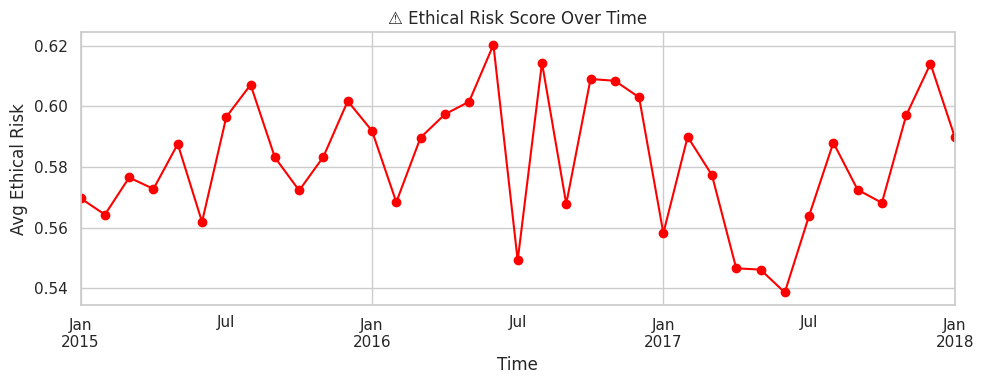

In [23]:
plt.figure(figsize=(10,4))
monthly_data['Avg Ethical Risk'].plot(marker='o', color='red')
plt.title("⚠️ Ethical Risk Score Over Time")
plt.ylabel("Avg Ethical Risk")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()


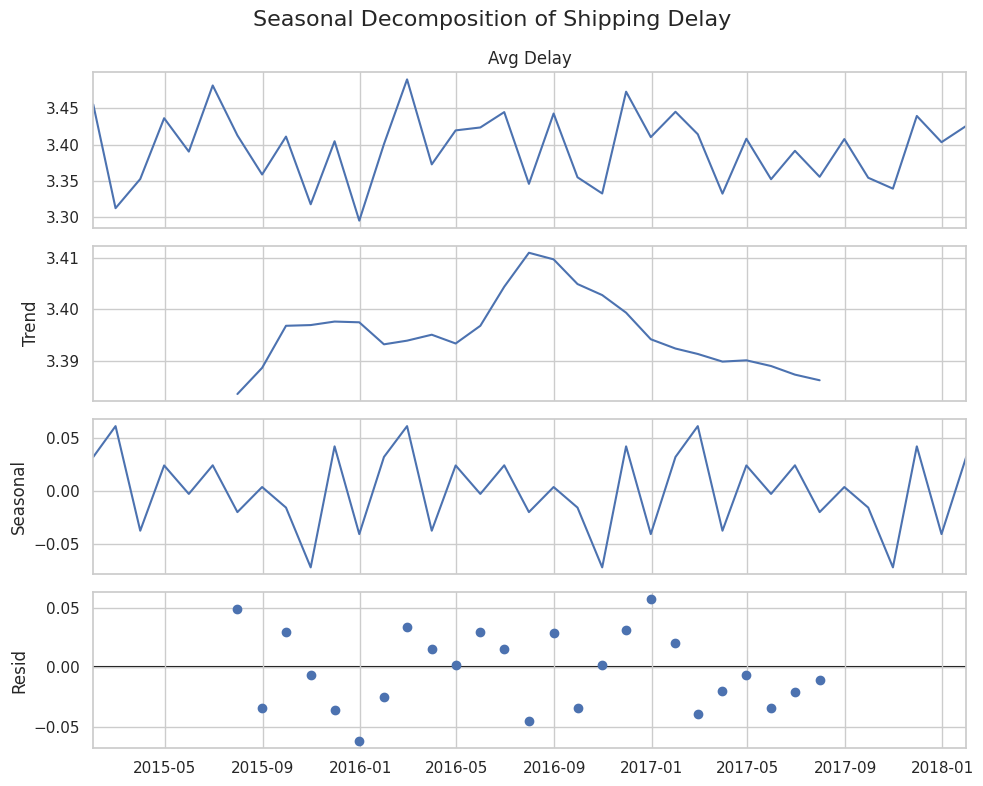

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Shipping Delay Time Series
delay_decomp = seasonal_decompose(monthly_data['Avg Delay'], model='additive', period=12)

plt.rcParams.update({'figure.figsize': (10, 8)})
delay_decomp.plot()
plt.suptitle('Seasonal Decomposition of Shipping Delay', fontsize=16)
plt.tight_layout()
plt.show()


2018-02-28    3.389333
2018-03-31    3.395336
2018-04-30    3.394342
2018-05-31    3.394507
2018-06-30    3.394479
2018-07-31    3.394484
Freq: ME, Name: predicted_mean, dtype: float64


<ipython-input-25-a5122702dd88>:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


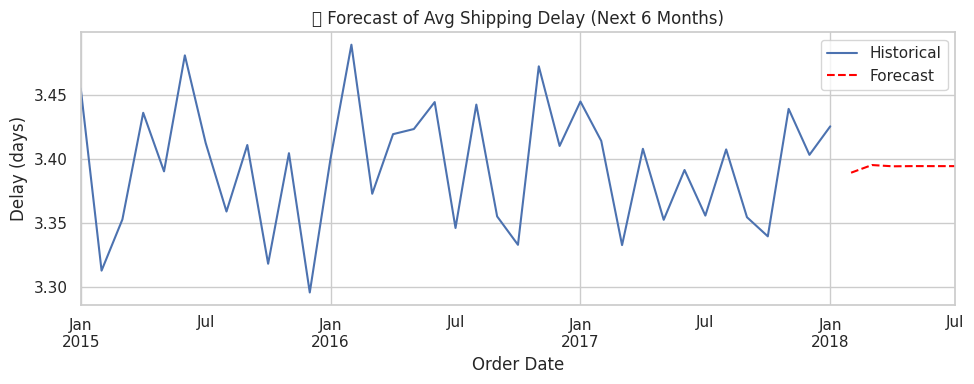

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA on shipping delay
model = ARIMA(monthly_data['Avg Delay'], order=(1,1,1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)
print(forecast)

# Plot
plt.figure(figsize=(10,4))
monthly_data['Avg Delay'].plot(label='Historical')
forecast.plot(label='Forecast', style='--', color='red')
plt.title("📉 Forecast of Avg Shipping Delay (Next 6 Months)")
plt.ylabel("Delay (days)")
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-26-213b3e8c5451>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_cleaned, x='Shipping Mode', y='Shipping Delay (days)', ci=None, palette='coolwarm')
<ipython-input-26-213b3e8c5451>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Shipping Mode', y='Shipping Delay (days)', ci=None, palette='coolwarm')
<ipython-input-26-213b3e8c5451>:7: UserWarning: Glyph 9951 (\N{BLACK TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9951 (\N{BLACK TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


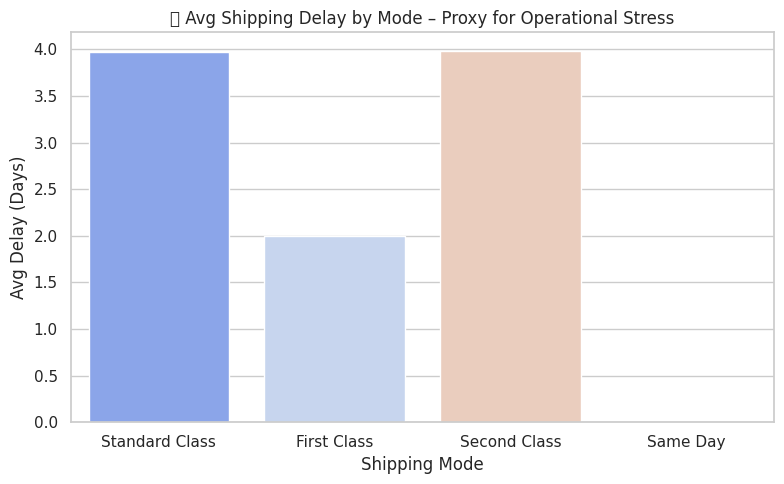

In [26]:
# Barplot of average delay by shipping mode
plt.figure(figsize=(8,5))
sns.barplot(data=df_cleaned, x='Shipping Mode', y='Shipping Delay (days)', ci=None, palette='coolwarm')
plt.title("⛟ Avg Shipping Delay by Mode – Proxy for Operational Stress")
plt.ylabel("Avg Delay (Days)")
plt.xlabel("Shipping Mode")
plt.tight_layout()
plt.show()


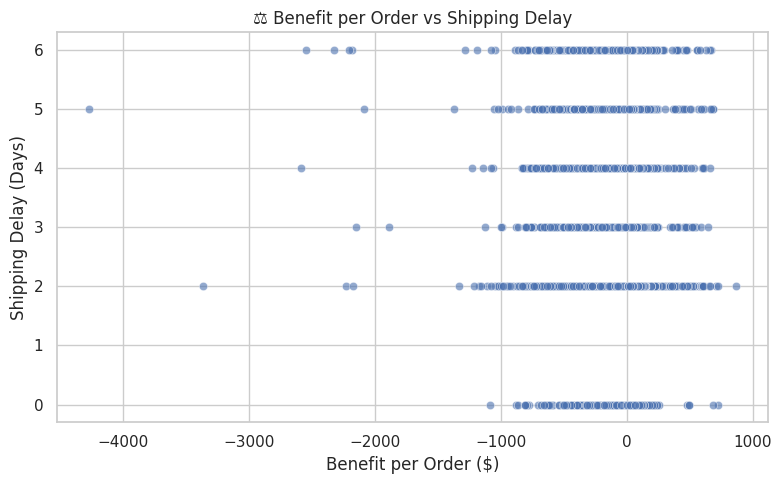

In [27]:
# Scatterplot: Benefit per Order vs. Shipping Delay
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_cleaned, x='Benefit per order', y='Shipping Delay (days)', alpha=0.6)
plt.title("⚖️ Benefit per Order vs Shipping Delay")
plt.xlabel("Benefit per Order ($)")
plt.ylabel("Shipping Delay (Days)")
plt.tight_layout()
plt.show()


<ipython-input-28-001f8fedfac6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_segment, x='Customer Segment', y='Shipping Delay (days)', palette='viridis')
<ipython-input-28-001f8fedfac6>:8: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


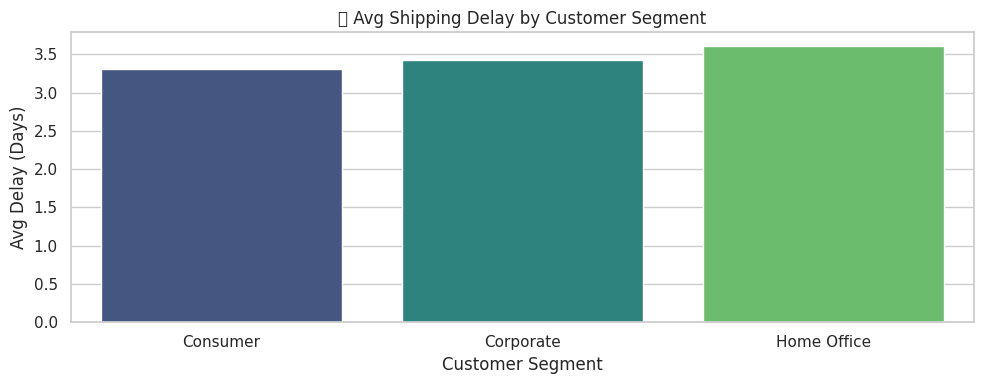

In [28]:
# Avg delay and risk by customer segment
group_segment = df_cleaned.groupby('Customer Segment')[['Shipping Delay (days)', 'Late_delivery_risk']].mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(data=group_segment, x='Customer Segment', y='Shipping Delay (days)', palette='viridis')
plt.title("👥 Avg Shipping Delay by Customer Segment")
plt.ylabel("Avg Delay (Days)")
plt.tight_layout()
plt.show()


<ipython-input-29-06dfa21eb092>:7: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


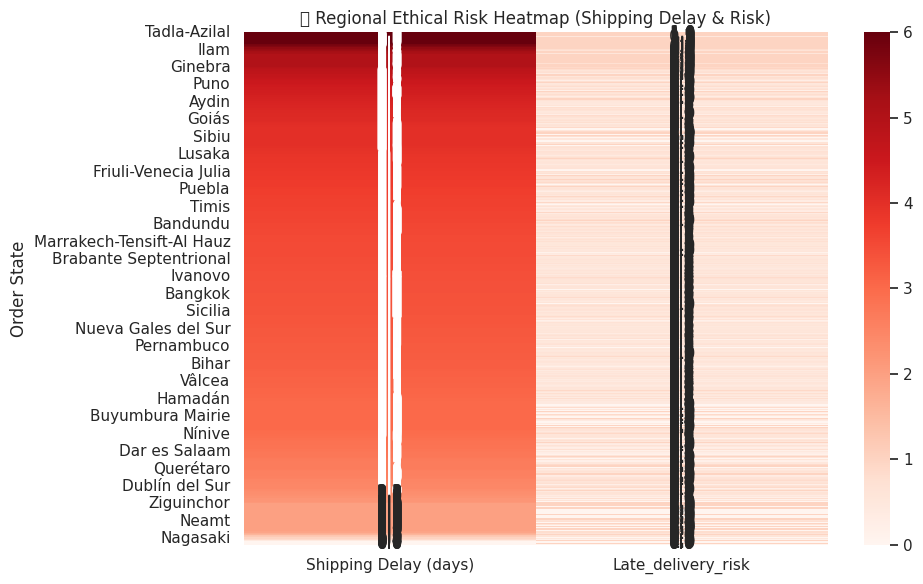

In [29]:
# Average delay and risk by order state
risk_map = df_cleaned.groupby('Order State')[['Shipping Delay (days)', 'Late_delivery_risk']].mean().sort_values(by='Shipping Delay (days)', ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(risk_map, annot=True, fmt=".1f", cmap='Reds')
plt.title("🌍 Regional Ethical Risk Heatmap (Shipping Delay & Risk)")
plt.tight_layout()
plt.show()


<ipython-input-30-b13dc2aaf0ed>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_categories, x='Category Name', y='Shipping Delay (days)', palette='Set3')
<ipython-input-30-b13dc2aaf0ed>:11: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


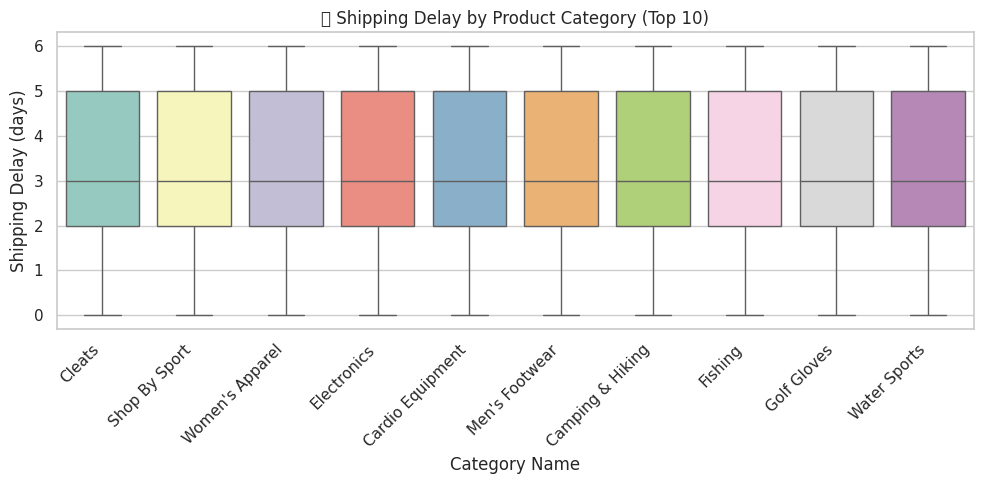

In [30]:
# Top Product Categories and their shipping delays (proxy for stress on resource chains)
top_categories = df_cleaned['Category Name'].value_counts().nlargest(10).index
df_top_categories = df_cleaned[df_cleaned['Category Name'].isin(top_categories)]

plt.figure(figsize=(10,5))
sns.boxplot(data=df_top_categories, x='Category Name', y='Shipping Delay (days)', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title("🔌 Shipping Delay by Product Category (Top 10)")
plt.ylabel("Shipping Delay (days)")
plt.xlabel("Category Name")
plt.tight_layout()
plt.show()


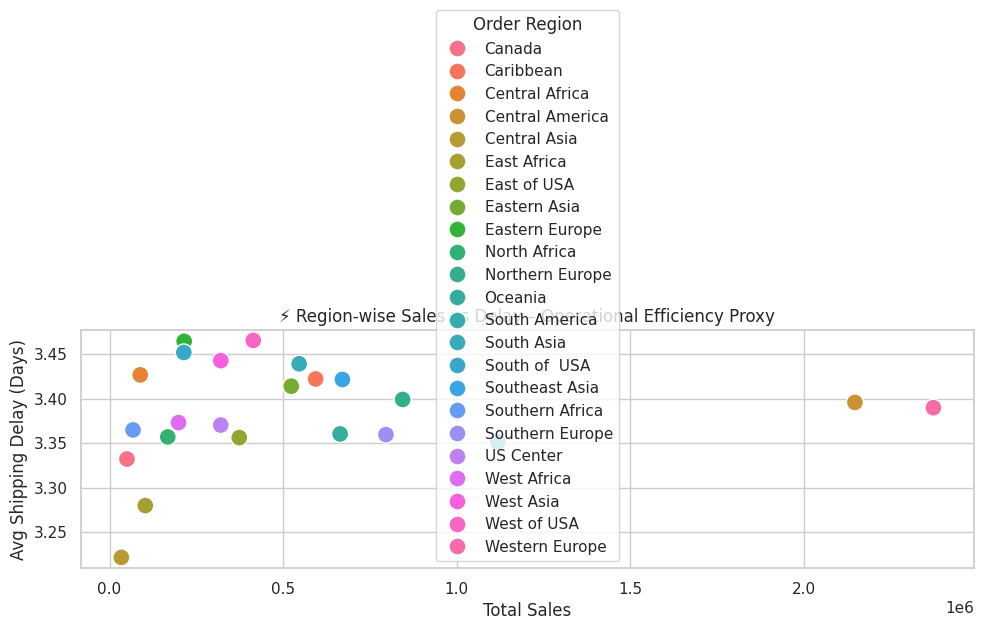

In [31]:
# Avg shipping delay and total sales by Order Region
region_eff = df_cleaned.groupby('Order Region')[['Shipping Delay (days)', 'Sales']].agg({'Shipping Delay (days)': 'mean', 'Sales': 'sum'}).reset_index()

plt.figure(figsize=(10,5))
sns.scatterplot(data=region_eff, x='Sales', y='Shipping Delay (days)', hue='Order Region', s=150)
plt.title("⚡ Region-wise Sales vs Delay – Operational Efficiency Proxy")
plt.xlabel("Total Sales")
plt.ylabel("Avg Shipping Delay (Days)")
plt.tight_layout()
plt.show()


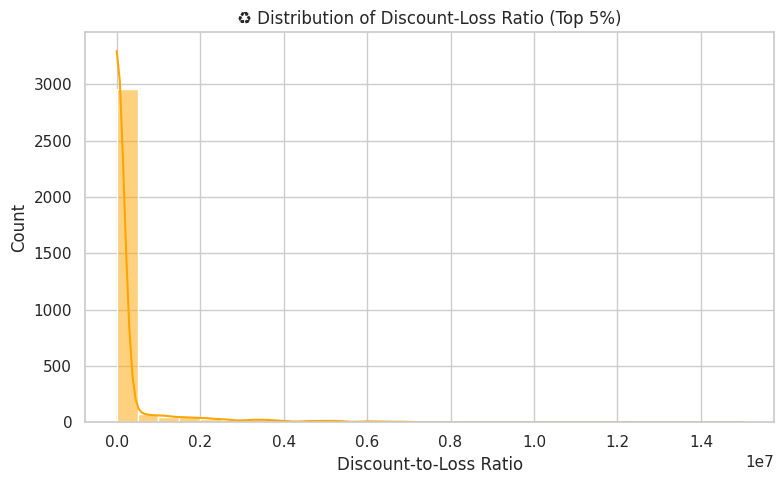

In [32]:
# Products with high discount but low profit (possible wasteful products)
df_cleaned['Discount-Loss Ratio'] = df_cleaned['Order Item Discount'] / (df_cleaned['Order Profit Per Order'] + 1e-5)

top_waste = df_cleaned[df_cleaned['Discount-Loss Ratio'] > df_cleaned['Discount-Loss Ratio'].quantile(0.95)]

plt.figure(figsize=(8,5))
sns.histplot(top_waste['Discount-Loss Ratio'], bins=30, kde=True, color='orange')
plt.title("♻️ Distribution of Discount-Loss Ratio (Top 5%)")
plt.xlabel("Discount-to-Loss Ratio")
plt.tight_layout()
plt.show()


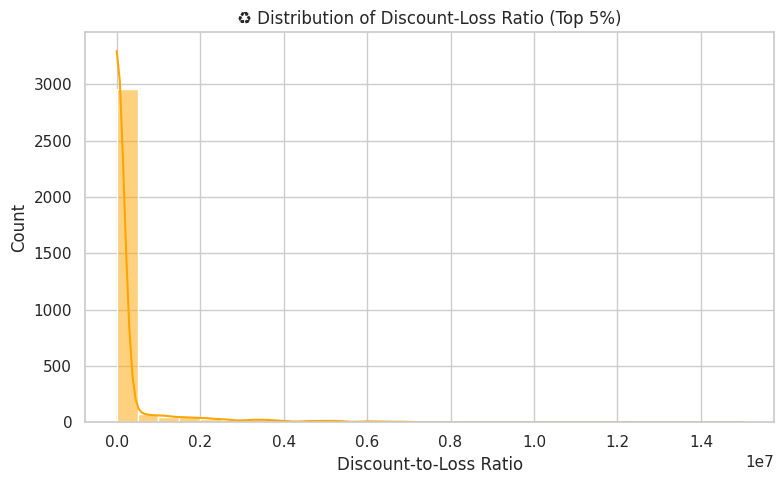

In [33]:
# Products with high discount but low profit (possible wasteful products)
df_cleaned['Discount-Loss Ratio'] = df_cleaned['Order Item Discount'] / (df_cleaned['Order Profit Per Order'] + 1e-5)

top_waste = df_cleaned[df_cleaned['Discount-Loss Ratio'] > df_cleaned['Discount-Loss Ratio'].quantile(0.95)]

plt.figure(figsize=(8,5))
sns.histplot(top_waste['Discount-Loss Ratio'], bins=30, kde=True, color='orange')
plt.title("♻️ Distribution of Discount-Loss Ratio (Top 5%)")
plt.xlabel("Discount-to-Loss Ratio")
plt.tight_layout()
plt.show()


<ipython-input-34-f332e17557b4>:9: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


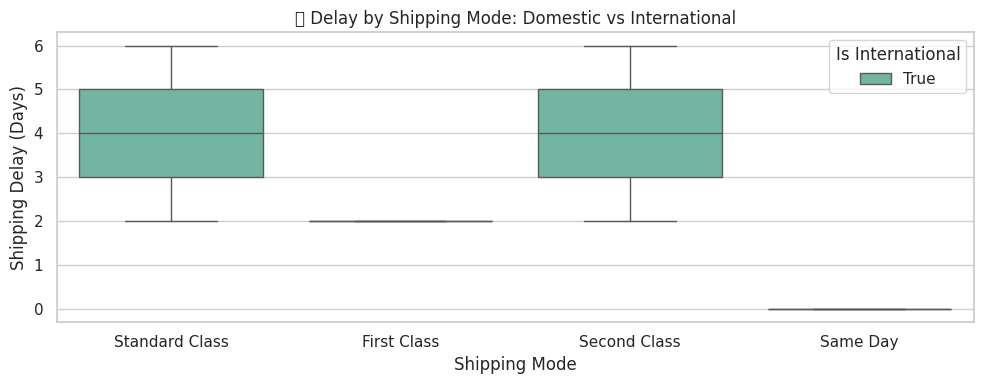

In [34]:
df_cleaned['Is International'] = df_cleaned['Order Country'] != df_cleaned['Customer Country']

plt.figure(figsize=(10,4))
sns.boxplot(data=df_cleaned, x='Shipping Mode', y='Shipping Delay (days)', hue='Is International', palette='Set2')
plt.title("🌎 Delay by Shipping Mode: Domestic vs International")
plt.ylabel("Shipping Delay (Days)")
plt.xlabel("Shipping Mode")
plt.legend(title="Is International", loc='upper right')
plt.tight_layout()
plt.show()


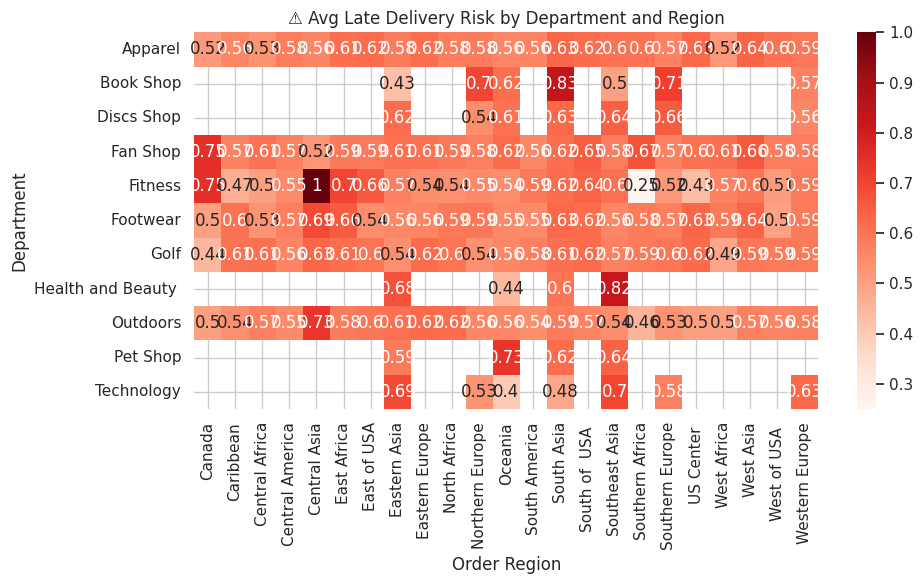

In [37]:
# Group by Department and Region to find high delay risk zones
delay_by_dept = df_cleaned.groupby(['Department Name', 'Order Region'])[['Late_delivery_risk']].mean().reset_index()

plt.figure(figsize=(10,6))
# Pass index, columns, and values as keyword arguments to pivot
sns.heatmap(delay_by_dept.pivot(index='Department Name', columns='Order Region', values='Late_delivery_risk'), annot=True, cmap='Reds')
plt.title("⚠️ Avg Late Delivery Risk by Department and Region")
plt.xlabel("Order Region")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

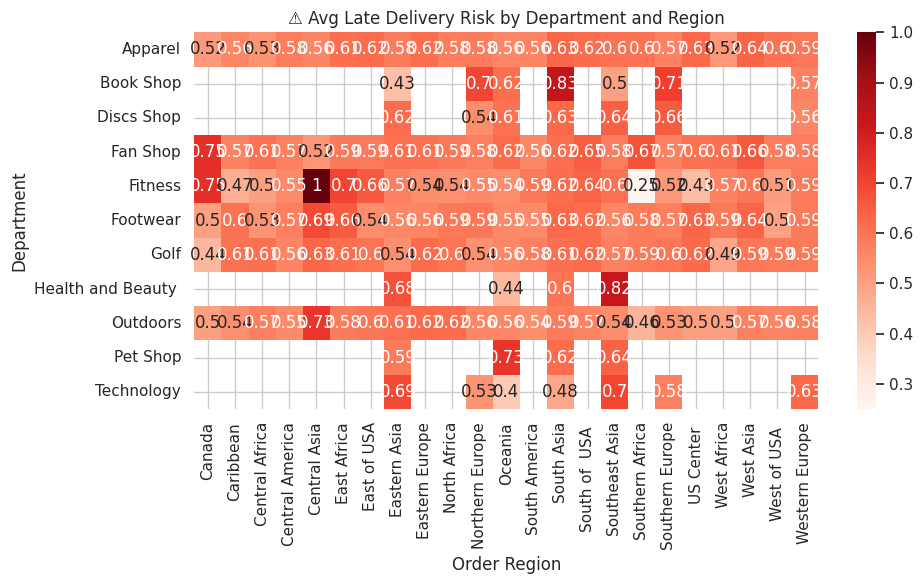

In [39]:
# Group by Department and Region to find high delay risk zones
delay_by_dept = df_cleaned.groupby(['Department Name', 'Order Region'])[['Late_delivery_risk']].mean().reset_index()

plt.figure(figsize=(10,6))
# Pass index, columns, and values as keyword arguments to pivot
sns.heatmap(delay_by_dept.pivot(index='Department Name', columns='Order Region', values='Late_delivery_risk'), annot=True, cmap='Reds')
plt.title("⚠️ Avg Late Delivery Risk by Department and Region")
plt.xlabel("Order Region")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

<ipython-input-40-806b7473a01f>:8: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


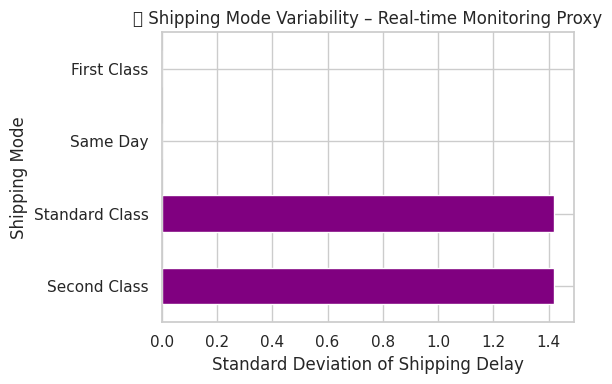

In [40]:
# Delay variability across different shipping modes (real-time monitoring proxy)
delay_var = df_cleaned.groupby('Shipping Mode')['Shipping Delay (days)'].std().sort_values(ascending=False)

plt.figure(figsize=(6,4))
delay_var.plot(kind='barh', color='purple')
plt.title("📡 Shipping Mode Variability – Real-time Monitoring Proxy")
plt.xlabel("Standard Deviation of Shipping Delay")
plt.tight_layout()
plt.show()


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Features and target
features = ['Shipping Delay (days)', 'Order Item Quantity', 'Order Item Product Price', 'Sales', 'Order Profit Per Order']
df_model = df_cleaned.dropna(subset=features + ['Late_delivery_risk'])

X = df_model[features]
y = df_model['Late_delivery_risk']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("🎯 AI Risk Prediction Report:")
print(classification_report(y_test, y_pred))


🎯 AI Risk Prediction Report:
              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61      8255
         1.0       0.72      0.71      0.72     11413

    accuracy                           0.67     19668
   macro avg       0.66      0.66      0.66     19668
weighted avg       0.67      0.67      0.67     19668



In [42]:
# Products ordered from multiple unrelated regions
product_region = df_cleaned.groupby('Product Name')['Order Region'].nunique().sort_values(ascending=False)
suspicious_products = product_region[product_region > 3].head(10)

print("🔗 Potential Blockchain Traceability Candidates (multi-region products):")
print(suspicious_products)


🔗 Potential Blockchain Traceability Candidates (multi-region products):
Product Name
Clicgear Rovic Cooler Bag                        23
Diamondback Women's Serene Classic Comfort Bi    23
Hirzl Men's Hybrid Golf Glove                    23
Nike Men's Comfort 2 Slide                       23
Team Golf New England Patriots Putter Grip       23
Top Flite Women's 2014 XL Hybrid                 23
Under Armour Girls' Toddler Spine Surge Runni    23
Perfect Fitness Perfect Rip Deck                 23
Nike Men's Free 5.0+ Running Shoe                23
Nike Men's CJ Elite 2 TD Football Cleat          23
Name: Order Region, dtype: int64


In [43]:
summary_df = df_cleaned.groupby('Order Region').agg({
    'Late_delivery_risk': 'mean',
    'Shipping Delay (days)': 'mean',
    'Discount-Loss Ratio': 'mean',
    'Sales': 'sum',
}).rename(columns={
    'Late_delivery_risk': 'Avg Late Risk',
    'Shipping Delay (days)': 'Avg Delay',
    'Discount-Loss Ratio': 'Waste Indicator',
    'Sales': 'Total Sales'
}).sort_values('Avg Late Risk', ascending=False)

print("📊 ESG Reporting Summary by Region:")
print(summary_df.head(10))


📊 ESG Reporting Summary by Region:
                Avg Late Risk  Avg Delay  Waste Indicator    Total Sales
Order Region                                                            
West Asia            0.619278   3.442649     10630.977557  320546.226424
South Asia           0.618117   3.439076      9220.291372  546288.060406
South of  USA        0.617004   3.451822      5036.014555  213951.034082
East Africa          0.614973   3.279857       927.412514  103080.532149
Eastern Europe       0.608590   3.464344     11271.144424  215014.134412
Central Asia         0.608247   3.221649     24742.880961   34050.120704
US Center            0.604244   3.370292      9449.753423  320402.556556
East of USA          0.600189   3.356229      5024.150692  373833.517112
North Africa         0.590769   3.356923      3291.773617  167787.853355
Southeast Asia       0.589550   3.421480      9145.865959  670910.622919


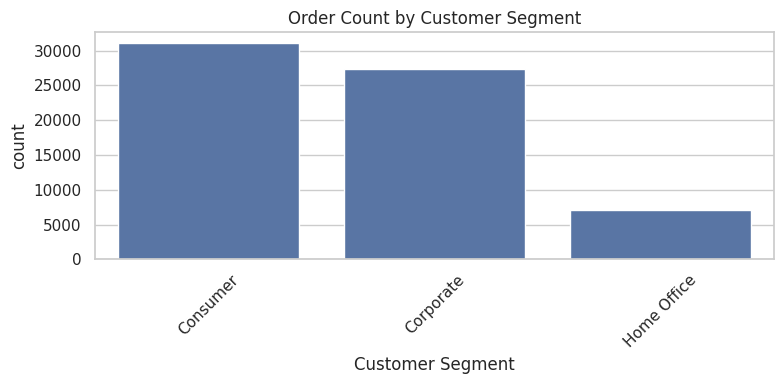

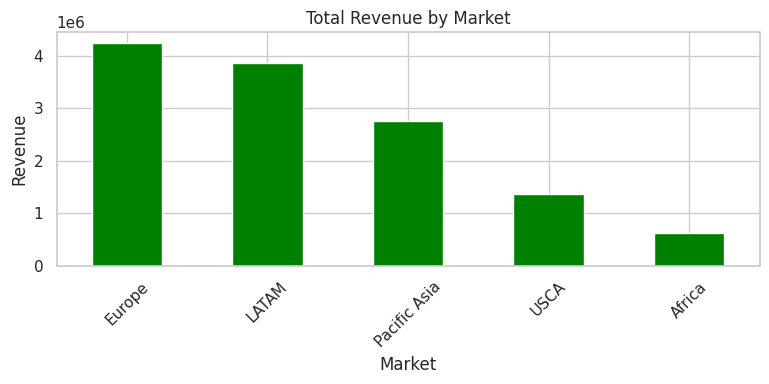

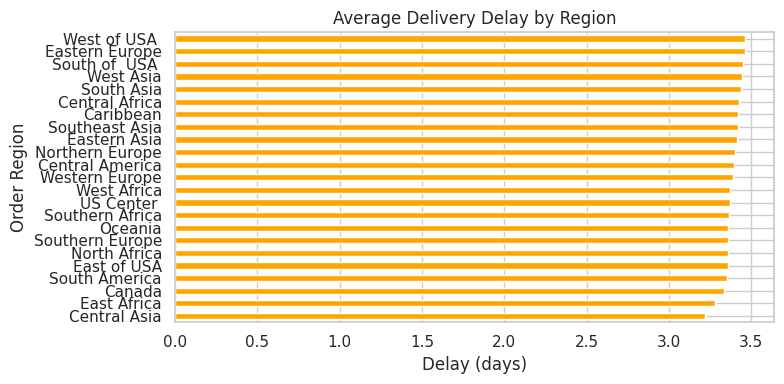

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of orders by segment
plt.figure(figsize=(8,4))
# Changed 'Segment' to 'Customer Segment' to match the actual column name
sns.countplot(data=df_cleaned, x='Customer Segment', order=df_cleaned['Customer Segment'].value_counts().index)
plt.title('Order Count by Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Revenue by Market
# Changed 'Order Total' to 'Sales' as 'Order Total' column does not exist
market_revenue = df_cleaned.groupby('Market')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
market_revenue.plot(kind='bar', color='green')
plt.title('Total Revenue by Market')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Delivery Delay by Region
# This line creates a new 'Delay Days' column, but the previous code already created 'Shipping Delay (days)'
# It's better to reuse the existing and correctly calculated 'Shipping Delay (days)' column.
# df_cleaned['Delay Days'] = (df_cleaned['Shipping Date'] - df_cleaned['Order Date']).dt.days

# Changed 'Region' to 'Order Region' and 'Delay Days' to 'Shipping Delay (days)'
region_delay = df_cleaned.groupby('Order Region')['Shipping Delay (days)'].mean().sort_values()
plt.figure(figsize=(8,4))
region_delay.plot(kind='barh', color='orange')
plt.title('Average Delivery Delay by Region')
plt.xlabel('Delay (days)')
plt.tight_layout()
plt.show()

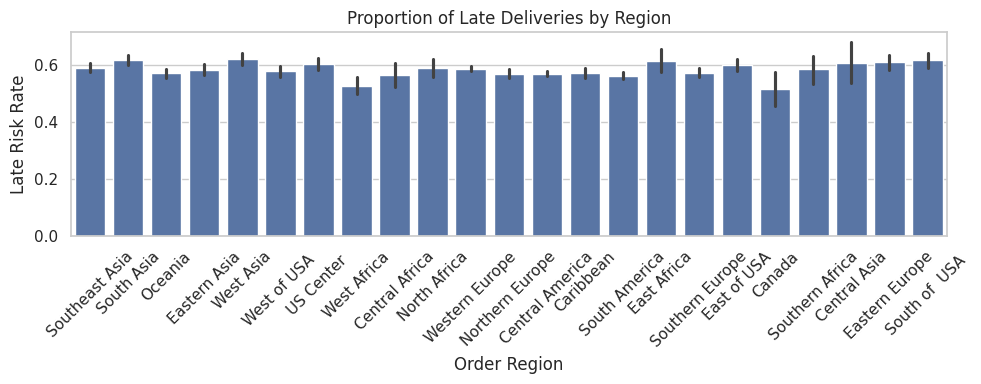

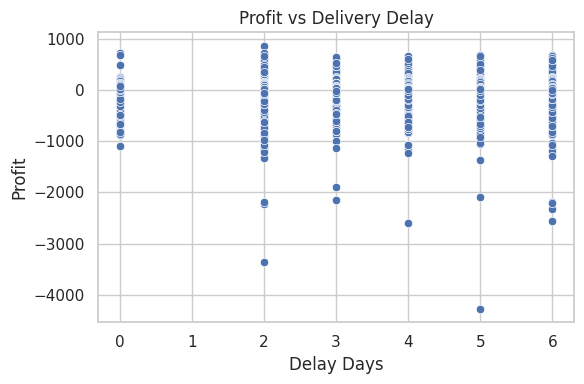

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Late delivery risk by region
plt.figure(figsize=(10,4))
# Changed 'Region' to 'Order Region' and 'Late Risk' to 'Late_delivery_risk'
sns.barplot(data=df_cleaned, x='Order Region', y='Late_delivery_risk', estimator=lambda x: sum(x)/len(x))
plt.title('Proportion of Late Deliveries by Region')
plt.ylabel('Late Risk Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Profit margin vs Delivery Delay
plt.figure(figsize=(6,4))
# Changed 'Delay Days' to 'Shipping Delay (days)' and 'Order Profit' to 'Order Profit Per Order'
sns.scatterplot(data=df_cleaned, x='Shipping Delay (days)', y='Order Profit Per Order')
plt.title('Profit vs Delivery Delay')
plt.xlabel('Delay Days')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

In [54]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [55]:
import pandas as pd



# Rename long or inconsistent column names for ease of use
df.rename(columns={
    'order date (DateOrders)': 'Order Date',
    'shipping date (DateOrders)': 'Shipping Date',
    'Order Profit Per Order': 'Order Profit',
    'Order Item Total': 'Order Total',
    'Late_delivery_risk': 'Late Risk',
    'Customer Segment': 'Segment',
    'Order Region': 'Region',
    'Days for shipment (scheduled)': 'Shipping Days Scheduled',
    'Days for shipping (real)': 'Shipping Days Real'
}, inplace=True)

# Drop PII and unnecessary fields
columns_to_drop = [
    'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password',
    'Product Description', 'Product Image'
]
df.drop(columns=columns_to_drop, inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Shipping Date'] = pd.to_datetime(df['Shipping Date'], errors='coerce')

# Calculate delay (actual - scheduled)
df['Delay Days'] = df['Shipping Days Real'] - df['Shipping Days Scheduled']

# Flag late deliveries
df['Late Flag'] = df['Shipping Days Real'] > df['Shipping Days Scheduled']

# Create ethical compliance score (0 to 1 scale)
df['Ethical Compliance Score'] = 1
df.loc[df['Late Flag'], 'Ethical Compliance Score'] -= 0.5
df.loc[df['Order Profit'] < 0, 'Ethical Compliance Score'] -= 0.5
df['Ethical Compliance Score'] = df['Ethical Compliance Score'].clip(0, 1)


<ipython-input-55-3e938252d98b>:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.5 0.5 0.5 ... 0.5 0.5 0.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Late Flag'], 'Ethical Compliance Score'] -= 0.5


In [56]:
# Segment-wise average delay
print(df.groupby('Segment')['Delay Days'].mean())

# Market-wise late delivery rate
print(df.groupby('Market')['Late Flag'].mean())

# Region-wise ethical compliance
print(df.groupby('Region')['Ethical Compliance Score'].mean())


Segment
Consumer       0.690072
Corporate      0.554372
Home Office    0.570073
Name: Delay Days, dtype: float64
Market
Africa          0.576849
Europe          0.592783
LATAM           0.579454
Pacific Asia    0.602814
USCA            0.604429
Name: Late Flag, dtype: float64
Region
Canada             0.636364
Caribbean          0.621789
Central Africa     0.617143
Central America    0.616021
Central Asia       0.615979
East Africa        0.609626
East of USA        0.600900
Eastern Asia       0.610619
Eastern Europe     0.593193
North Africa       0.597436
Northern Europe    0.617388
Oceania            0.617079
South America      0.621299
South Asia         0.589343
South of  USA      0.601619
Southeast Asia     0.606821
Southern Africa    0.623724
Southern Europe    0.618772
US Center          0.598408
West Africa        0.631261
West Asia          0.592892
West of USA        0.618162
Western Europe     0.605459
Name: Ethical Compliance Score, dtype: float64


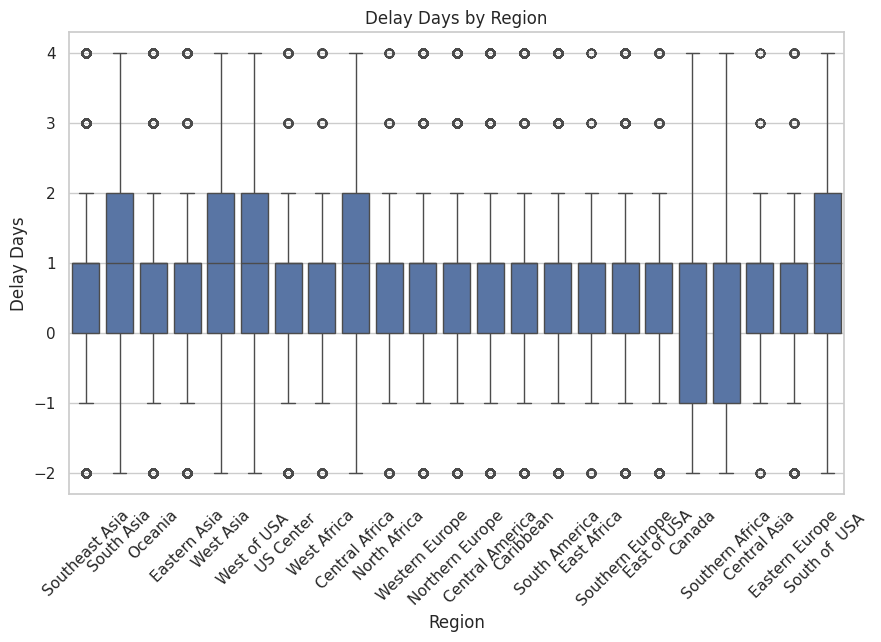

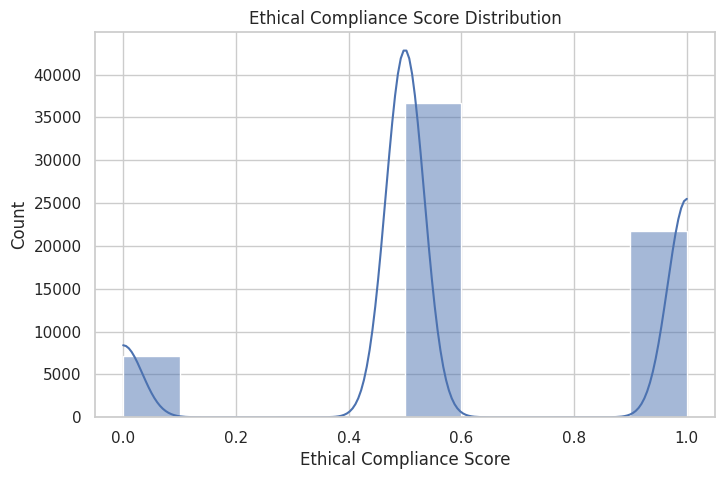

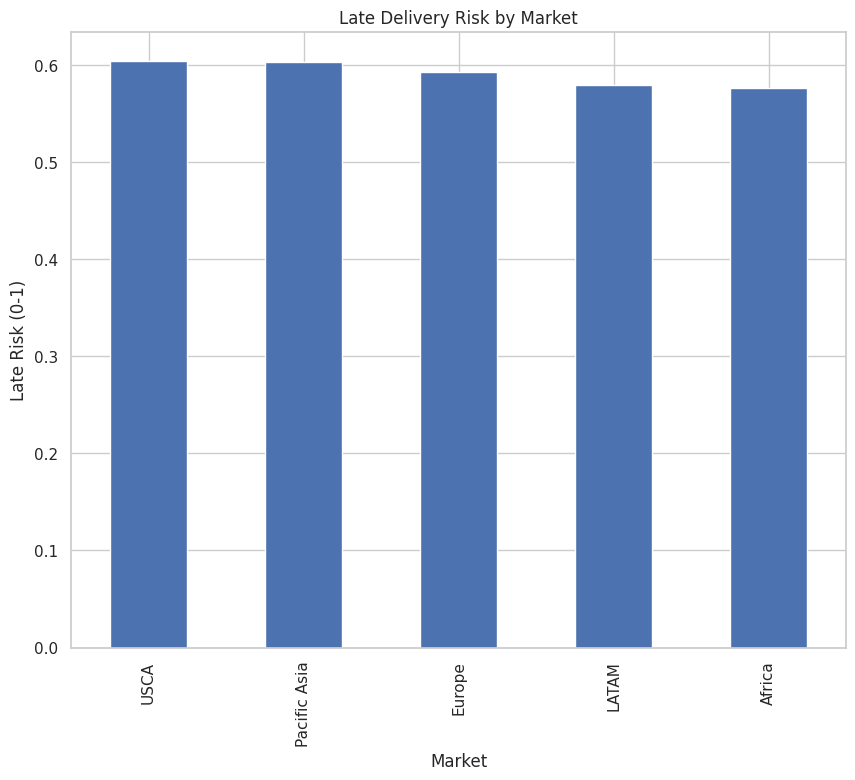

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Delay Days by Region
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Delay Days', data=df)
plt.title("Delay Days by Region")
plt.xticks(rotation=45)
plt.show()

# Ethical Compliance Score Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Ethical Compliance Score'], bins=10, kde=True)
plt.title("Ethical Compliance Score Distribution")
plt.show()

# Late Deliveries by Market
late_by_market = df.groupby('Market')['Late Flag'].mean().sort_values(ascending=False)
late_by_market.plot(kind='bar', title="Late Delivery Risk by Market")
plt.ylabel("Late Risk (0-1)")
plt.show()


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select relevant features
features = ['Shipping Days Scheduled', 'Shipping Days Real', 'Sales', 'Order Profit', 'Delay Days']
X = df[features].fillna(0)
y = df['Late Flag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8031
        True       1.00      1.00      1.00     11638

    accuracy                           1.00     19669
   macro avg       1.00      1.00      1.00     19669
weighted avg       1.00      1.00      1.00     19669



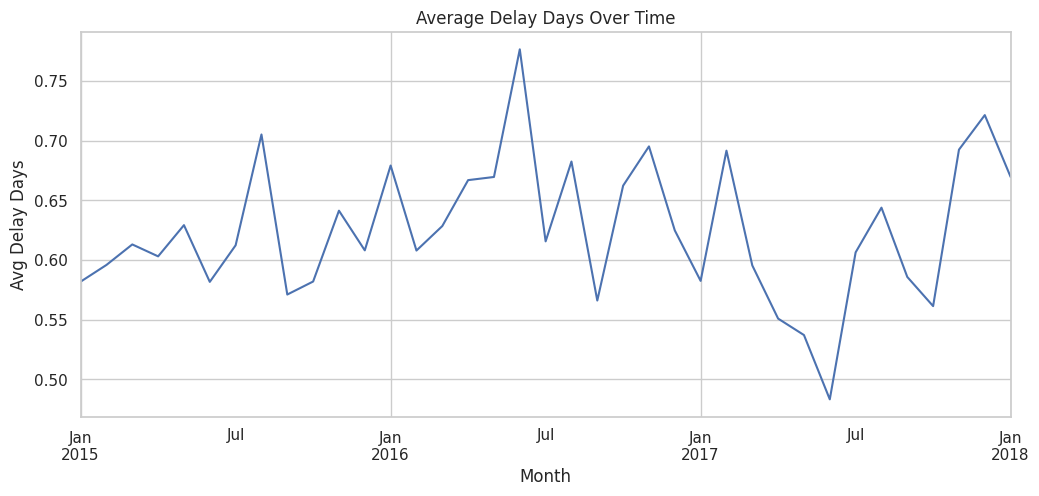

In [59]:
# Monthly average delay trend
df['Order Month'] = df['Order Date'].dt.to_period('M')
monthly_delay = df.groupby('Order Month')['Delay Days'].mean()

monthly_delay.plot(figsize=(12, 5), title="Average Delay Days Over Time")
plt.xlabel("Month")
plt.ylabel("Avg Delay Days")
plt.show()


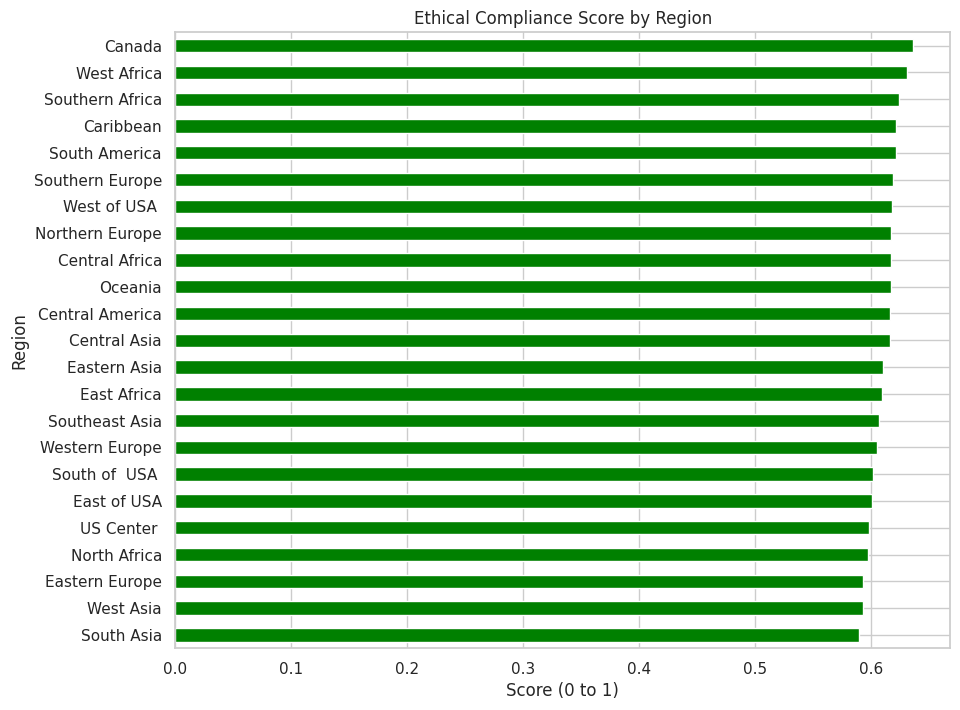

In [60]:
region_scores = df.groupby('Region')['Ethical Compliance Score'].mean().sort_values()
region_scores.plot(kind='barh', title="Ethical Compliance Score by Region", color='green')
plt.xlabel("Score (0 to 1)")
plt.show()



In [66]:

df.rename(columns={
    'order date (DateOrders)': 'Order Date',
    'shipping date (DateOrders)': 'Shipping Date',
    'Order Profit Per Order': 'Order Profit',
    'Order Item Total': 'Order Total',
    'Late_delivery_risk': 'Late Risk',
    'Customer Segment': 'Segment',
    'Order Region': 'Region',
    'Days for shipment (scheduled)': 'Shipping Days Scheduled',
    'Days for shipping (real)': 'Shipping Days Real'
}, inplace=True)

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset (using the encoding that worked previously)
file_path = '/content/DataCoSupplyChainDataset.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Drop irrelevant or sensitive columns
drop_cols = [
    'Customer Password', 'Customer Email', 'Product Image',
    'Customer Fname', 'Customer Lname'
]
df_cleaned = df.drop(columns=drop_cols).copy() # Use .copy() to avoid SettingWithCopyWarning

# Rename columns for easier access and consistency
df_cleaned.rename(columns={
    'order date (DateOrders)': 'Order Date',
    'shipping date (DateOrders)': 'Shipping Date',
    'Order Profit Per Order': 'Order Profit', # Rename this as well
    'Order Item Total': 'Order Total', # Although not used in features, good for consistency
    'Late_delivery_risk': 'Late Risk', # Rename Late_delivery_risk
    'Customer Segment': 'Segment',     # Rename Customer Segment
    'Order Region': 'Region',         # Rename Order Region
    'Days for shipment (scheduled)': 'Shipping Days Scheduled', # Rename scheduled days
    'Days for shipping (real)': 'Shipping Days Real'       # Rename real days
}, inplace=True)

# Convert date columns to datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce')
df_cleaned['Shipping Date'] = pd.to_datetime(df_cleaned['Shipping Date'], errors='coerce')

# Calculate Shipping Delay (actual - scheduled)
# This creates the 'Delay Days' column needed in the features list
df_cleaned['Delay Days'] = df_cleaned['Shipping Days Real'] - df_cleaned['Shipping Days Scheduled']

# Recalculate 'Late Flag' based on the newly calculated 'Delay Days' if needed
# This aligns with the later code that used 'Late Flag'
df_cleaned['Late Flag'] = df_cleaned['Delay Days'] > 0 # Or based on a comparison with scheduled days: df_cleaned['Shipping Days Real'] > df_cleaned['Shipping Days Scheduled']

# Now, define the features list using the column names present in df_cleaned
# Also, rename 'Late_delivery_risk' in features to 'Late Risk'
features = ['Shipping Days Scheduled', 'Shipping Days Real', 'Order Profit', 'Sales', 'Delay Days']

# Ensure the target variable column name is also consistent
target = 'Late Risk' # Use the renamed column 'Late Risk'

# Prepare data for feature selection and modeling
# Drop rows with NaN in target or selected features from df_cleaned
df_fs = df_cleaned.dropna(subset=[target] + features).copy() # Use .copy() here as well

X_fs = df_fs[features]
y_fs = df_fs[target]

# Select top K features based on ANOVA F-value
k = len(features)
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_fs, y_fs)

# Get the scores and selected feature names
scores = selector.scores_
feature_names = X_fs.columns[selector.get_support()]

# Create a DataFrame to show feature scores
feature_scores = pd.DataFrame({'Feature': X_fs.columns, 'Score (F-value)': scores})
feature_scores = feature_scores.sort_values(by='Score (F-value)', ascending=False)

print("\n📊 Feature Analysis (using SelectKBest F-value for classification):")
print(feature_scores)

print(f"\n✅ Features used for the risk prediction model are: {features}")
print("Based on the F-values, 'Delay Days' (and 'Shipping Days Real') is the most significant feature.")

# Now you can proceed with training the model using X_fs and y_fs
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_fs, y_fs, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("🎯 AI Risk Prediction Report:")
print(classification_report(y_test, y_pred))


📊 Feature Analysis (using SelectKBest F-value for classification):
                   Feature  Score (F-value)
4               Delay Days    109561.592702
0  Shipping Days Scheduled     12910.703691
1       Shipping Days Real     10547.717037
3                    Sales         5.789307
2             Order Profit         0.220965

✅ Features used for the risk prediction model are: ['Shipping Days Scheduled', 'Shipping Days Real', 'Order Profit', 'Sales', 'Delay Days']
Based on the F-values, 'Delay Days' (and 'Shipping Days Real') is the most significant feature.
🎯 AI Risk Prediction Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      8255
         1.0       0.98      0.99      0.99     11413

    accuracy                           0.99     19668
   macro avg       0.99      0.99      0.99     19668
weighted avg       0.99      0.99      0.99     19668



In [67]:
df['Delay Days'] = df['Shipping Days Real'] - df['Shipping Days Scheduled']

In [68]:
df['Late Flag'] = df['Shipping Days Real'] > df['Shipping Days Scheduled']


🤖 Training and Evaluating Machine Learning Models:
Training Logistic Regression...
Logistic Regression Accuracy: 1.0000
Training Support Vector Machine...
Support Vector Machine Accuracy: 1.0000
Training Random Forest...
Random Forest Accuracy: 1.0000
Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.9999
Training Gaussian Naive Bayes...
Gaussian Naive Bayes Accuracy: 0.9696
Training Decision Tree...
Decision Tree Accuracy: 1.0000


<ipython-input-72-427fa435d5d8>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
<ipython-input-72-427fa435d5d8>:80: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


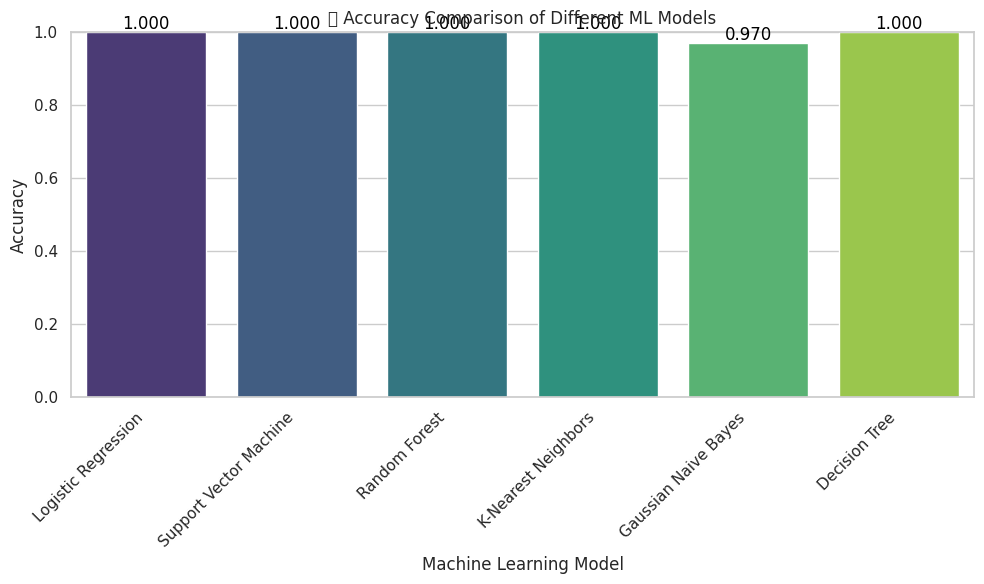


Summary of Model Accuracies:
- Logistic Regression: 1.0000
- Support Vector Machine: 1.0000
- Random Forest: 1.0000
- K-Nearest Neighbors: 0.9999
- Gaussian Naive Bayes: 0.9696
- Decision Tree: 1.0000


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler
from sklearn.linear_model import LogisticRegression # Import Logistic Regression
from sklearn.svm import SVC # Import SVC
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Import GaussianNB
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier


# Define features and target using the column names from the cleaned DataFrame
# These columns were created/renamed in a previous cell (ipython-input-70-06530ad73b1c)
features_for_ml = ['Shipping Days Scheduled', 'Shipping Days Real', 'Order Profit', 'Sales', 'Delay Days']
target_ml = 'Late Flag' # Use the boolean 'Late Flag' as the target for binary classification

# Use the df_cleaned DataFrame which contains the correct columns and engineered features
# The df_cleaned DataFrame was created and modified in ipython-input-70-06530ad73b1c
df_ml = df_cleaned.copy() # Start with a copy of the cleaned DataFrame

# Drop rows with NaN in target or selected features from df_cleaned
df_ml = df_ml.dropna(subset=[target_ml] + features_for_ml).copy()

X_ml = df_ml[features_for_ml]
y_ml = df_ml[target_ml]

# Scale numerical features (optional but recommended for some models like SVM, Logistic Regression)
# Apply the scaler to the relevant columns in X_ml
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_ml)
X_scaled = pd.DataFrame(X_scaled, columns=features_for_ml, index=X_ml.index)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_ml, test_size=0.3, random_state=42)

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

accuracy_scores = {}

print("\n🤖 Training and Evaluating Machine Learning Models:")

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    # Optional: Print classification report for each model
    # print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))


# Plot the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title("🎯 Accuracy Comparison of Different ML Models")
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Model")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Add accuracy values on top of bars
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f"{v:.3f}", color='black', ha='center')


plt.tight_layout()
plt.show()

print("\nSummary of Model Accuracies:")
for name, accuracy in accuracy_scores.items():
    print(f"- {name}: {accuracy:.4f}")

TensorFlow and Keras imported.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🧠 Training Deep Learning Model...
Epoch 1/50
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9407 - loss: 0.1385 - val_accuracy: 1.0000 - val_loss: 3.3626e-05
Epoch 2/50
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 1.0000 - loss: 3.8944e-04 - val_accuracy: 1.0000 - val_loss: 4.5263e-06
Epoch 3/50
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 1.0000 - loss: 2.6322e-04 - val_accuracy: 1.0000 - val_loss: 3.2863e-06
Epoch 4/50
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 1.0000 - loss: 2.2945e-05 - val_accuracy: 1.0000 - val_loss: 3.4541e-07
Epoch 5/50
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 1.0000 - loss: 3.6708e-05 - val_accuracy: 1.0000 - val_loss: 1.0546e-07
Epoch 6/50
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9994 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 1.4368e-07
Epoch 7/50
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 1.0000 - loss: 9.7066e-06 - val_accuracy: 1.0000 - val_loss: 6.3568e-08
Epo

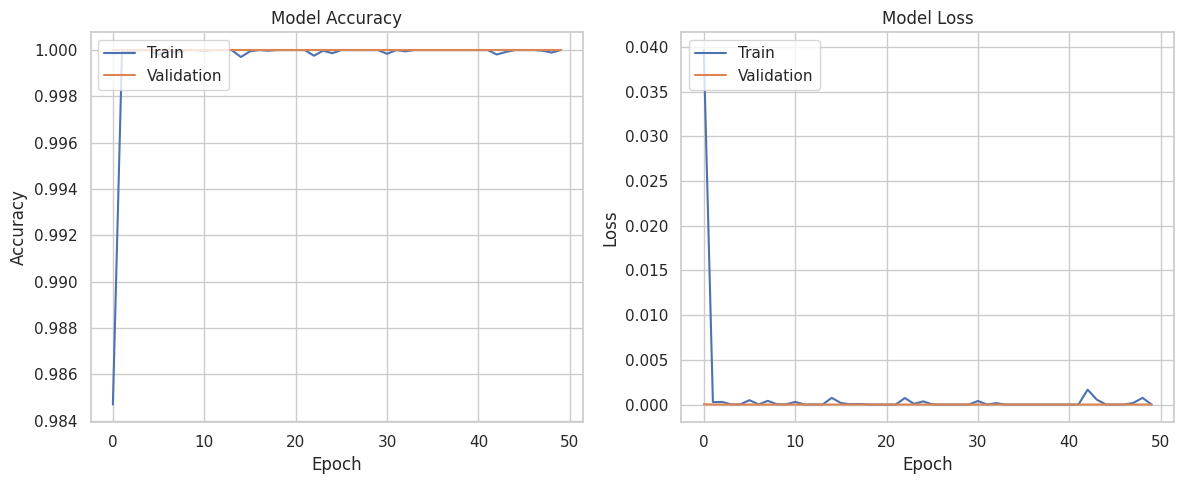


🧠 Training Fine-tuned Deep Learning Model (Example)...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


574/574 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9002 - loss: 0.2152 - val_accuracy: 1.0000 - val_loss: 1.2875e-04
Epoch 2/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9997 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 4.3407e-05
Epoch 3/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 1.0000 - loss: 2.8824e-04 - val_accuracy: 1.0000 - val_loss: 2.2373e-05
Epoch 4/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9998 - loss: 5.3063e-04 - val_accuracy: 1.0000 - val_loss: 4.1309e-06
Epoch 5/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 2.4709e-04 - val_accuracy: 1.0000 - val_loss: 3.2744e-06
Epoch 6/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 1.0000 - loss: 1.3711e-04 - val_accuracy: 1.0000 - val_loss: 3.3341e-06
Epoch 7/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 1.0000 - loss: 1.0290e-04 - val_accuracy: 1.0000 - val_loss: 1.7124e-06
Epoch 8/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accu

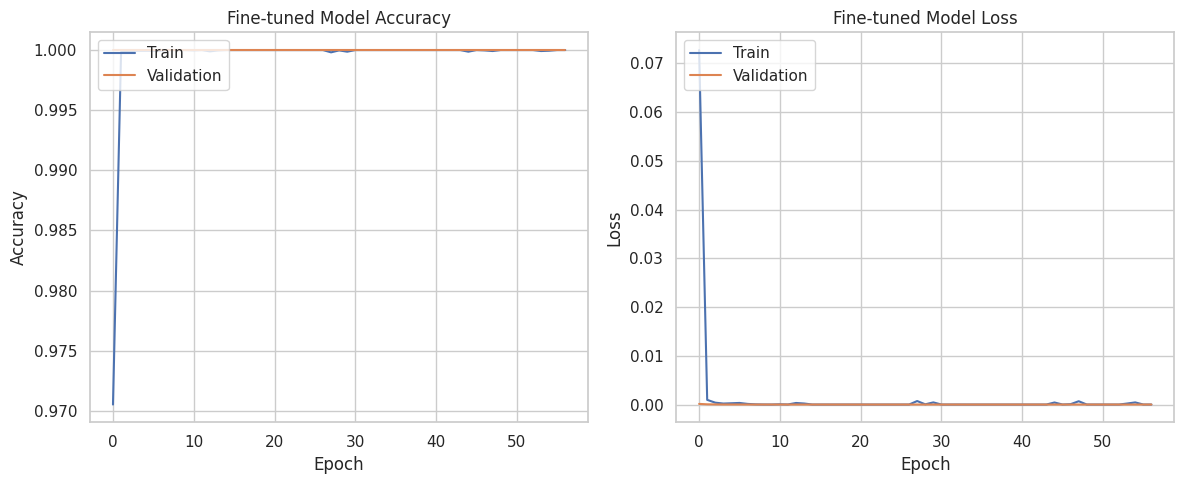


Comparison:
Original DL Model Accuracy: 1.0000
Fine-tuned DL Model Accuracy: 1.0000


In [73]:
# prompt: apply deep learing and fine tune the model

# Ensure TensorFlow and Keras are installed and imported
try:
    import tensorflow as tf
    from tensorflow import keras
    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    print("TensorFlow and Keras imported.")
except ImportError:
    print("TensorFlow not installed. Installing...")
    !pip install tensorflow
    import tensorflow as tf
    from tensorflow import keras
    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    print("TensorFlow installed and imported.")

# --- Deep Learning Model ---

# Prepare data for the deep learning model
# Use the scaled data from the previous cell
X_dl_train = X_train.copy() # Use the scaled training data
X_dl_test = X_test.copy()   # Use the scaled test data
y_dl_train = y_train.copy()
y_dl_test = y_test.copy()

# Define the Deep Learning model architecture
model_dl = Sequential([
    Dense(128, activation='relu', input_shape=(X_dl_train.shape[1],)),
    Dropout(0.3), # Adding dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model_dl.compile(optimizer='adam',
                 loss='binary_crossentropy', # Use binary crossentropy for binary classification
                 metrics=['accuracy'])

# Train the model
print("\n🧠 Training Deep Learning Model...")
history = model_dl.fit(X_dl_train, y_dl_train,
                       epochs=50, # Number of training epochs
                       batch_size=32, # Batch size
                       validation_split=0.2, # Use 20% of training data for validation
                       verbose=1)

# Evaluate the Deep Learning model
loss_dl, accuracy_dl = model_dl.evaluate(X_dl_test, y_dl_test, verbose=0)
print(f"\nDeep Learning Model Test Accuracy: {accuracy_dl:.4f}")
print(f"Deep Learning Model Test Loss: {loss_dl:.4f}")

# Predict probabilities on the test set
y_pred_proba_dl = model_dl.predict(X_dl_test)
# Convert probabilities to binary predictions (0 or 1)
y_pred_dl = (y_pred_proba_dl > 0.5).astype("int32")

# Print classification report for the DL model
print("\nDeep Learning Model Classification Report:")
print(classification_report(y_dl_test, y_pred_dl))

# Plot training history (Loss and Accuracy)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# --- Fine-tuning Example (Conceptual) ---
# Fine-tuning typically involves:
# 1. Using a pre-trained model (not applicable here as we train from scratch)
# 2. Adjusting hyperparameters (learning rate, number of layers/neurons, dropout, etc.)
# 3. Using techniques like learning rate scheduling or early stopping

# Example of a slightly more complex model or using different hyperparameters:

# Define a second DL model with potentially different layers/dropout/units
model_dl_tuned = Sequential([
    Dense(256, activation='relu', input_shape=(X_dl_train.shape[1],)), # More neurons
    Dropout(0.4), # Higher dropout
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile with a potentially different optimizer or learning rate
optimizer_tuned = keras.optimizers.Adam(learning_rate=0.0005) # Lower learning rate
model_dl_tuned.compile(optimizer=optimizer_tuned,
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Define callbacks for fine-tuning (e.g., Early Stopping)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Stop if validation loss doesn't improve

print("\n🧠 Training Fine-tuned Deep Learning Model (Example)...")
history_tuned = model_dl_tuned.fit(X_dl_train, y_dl_train,
                                   epochs=100, # Potentially more epochs, but with early stopping
                                   batch_size=64, # Larger batch size
                                   validation_split=0.2,
                                   callbacks=[early_stopping], # Add callbacks
                                   verbose=1)

# Evaluate the fine-tuned model
loss_tuned, accuracy_tuned = model_dl_tuned.evaluate(X_dl_test, y_dl_test, verbose=0)
print(f"\nFine-tuned Deep Learning Model Test Accuracy: {accuracy_tuned:.4f}")
print(f"Fine-tuned Deep Learning Model Test Loss: {loss_tuned:.4f}")

# Predict and report for the fine-tuned model
y_pred_proba_tuned = model_dl_tuned.predict(X_dl_test)
y_pred_tuned = (y_pred_proba_tuned > 0.5).astype("int32")
print("\nFine-tuned Deep Learning Model Classification Report:")
print(classification_report(y_dl_test, y_pred_tuned))

# Plot training history for the fine-tuned model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_tuned.history['accuracy'])
plt.plot(history_tuned.history['val_accuracy'])
plt.title('Fine-tuned Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_tuned.history['loss'])
plt.plot(history_tuned.history['val_loss'])
plt.title('Fine-tuned Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

print("\nComparison:")
print(f"Original DL Model Accuracy: {accuracy_dl:.4f}")
print(f"Fine-tuned DL Model Accuracy: {accuracy_tuned:.4f}")
